Saving images.png to images (1).png


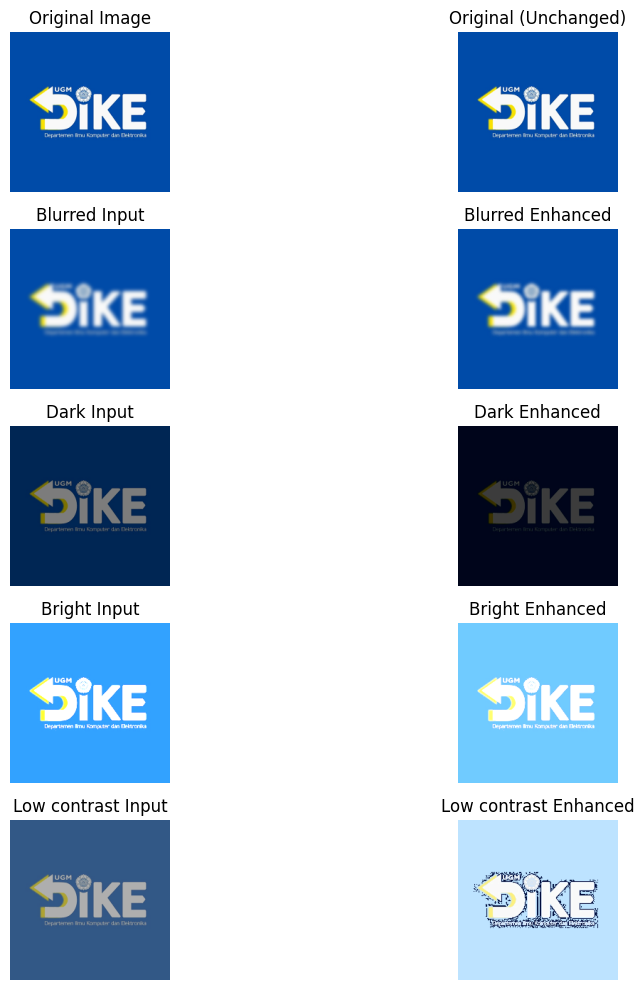

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# === Upload image from local computer ===
uploaded = files.upload()
image_path = list(uploaded.keys())[0]   # get uploaded file name
img = cv2.imread(image_path)

if img is None:
    raise ValueError("Error: Could not load image. Please re-upload.")

# --- Image degradation functions (to simulate problems) ---
def make_blurred(image):
    return cv2.GaussianBlur(image, (15, 15), 0)

def make_dark(image):
    return cv2.convertScaleAbs(image, alpha=0.5, beta=0)

def make_bright(image):
    return cv2.convertScaleAbs(image, alpha=1.5, beta=50)

def make_low_contrast(image):
    return cv2.convertScaleAbs(image, alpha=0.5, beta=50)

# --- Enhancement functions ---
def enhance_image(image, mode):
    if mode == "blurred":
        # Sharpen filter
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
        return cv2.filter2D(image, -1, kernel)
    elif mode == "dark":
        # Brighten using gamma correction
        gamma = 0.5
        invGamma = 1.0 / gamma
        table = np.array([(i / 255.0) ** invGamma * 255
                          for i in np.arange(256)]).astype("uint8")
        return cv2.LUT(image, table)
    elif mode == "bright":
        # Darken using gamma correction
        gamma = 2.0
        invGamma = 1.0 / gamma
        table = np.array([(i / 255.0) ** invGamma * 255
                          for i in np.arange(256)]).astype("uint8")
        return cv2.LUT(image, table)
    elif mode == "low contrast":
        # Histogram Equalization (on Y channel)
        ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        y, cr, cb = cv2.split(ycrcb)
        y_eq = cv2.equalizeHist(y)
        ycrcb_eq = cv2.merge([y_eq, cr, cb])
        return cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)
    else:
        return image

# --- Create degraded versions ---
variants = {
    "blurred": make_blurred(img),
    "dark": make_dark(img),
    "bright": make_bright(img),
    "low contrast": make_low_contrast(img)
}

# --- Show Original + Each Enhancement ---
plt.figure(figsize=(12, 10))

# Original
plt.subplot(5, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(5, 2, 2)
plt.title("Original (Unchanged)")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Each variant and its enhancement
row = 2
for mode, degraded in variants.items():
    enhanced = enhance_image(degraded, mode)

    plt.subplot(5, 2, row*2 - 1)
    plt.title(f"{mode.capitalize()} Input")
    plt.imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(5, 2, row*2)
    plt.title(f"{mode.capitalize()} Enhanced")
    plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    row += 1

plt.tight_layout()
plt.show()
